# 도시간 소요시간

- http://data.ex.co.kr/openapi/basicinfo/openApiInfoM?apiId=0153&serviceType=&keyWord=%EC%86%8C%EC%9A%94%EC%8B%9C%EA%B0%84&searchDayFrom=2014.12.01&searchDayTo=2022.09.05&CATEGORY=&GROUP_TR=


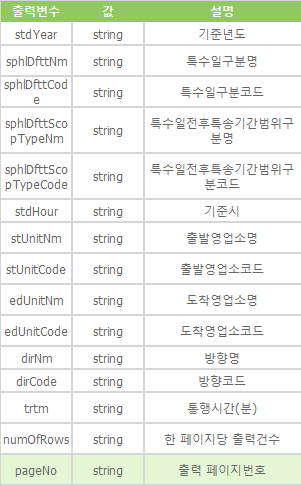

In [ ]:
import pandas as pd
import urllib.request 
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import xmltodict
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [ ]:
# 인증키와 주소
key = ''
rows = 1000
nums = 1
result = []
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    for nums in range(1, 53):
        url = f'http://data.ex.co.kr/openapi/specialAnal/intercityLeadTime?key={key}&type=json&iYear={year}&numOfRows={rows}&pageNo={nums}'

        response = urllib.request.urlopen(url) 
        json_str = response.read().decode('utf-8')
        json_object = json.loads(json_str)

        result += json_object['intercityLeadTimeLists']

        data = pd.json_normalize(result)


In [ ]:
data.head()

,stdHour,iYear,iStUnitCode,iEdUnitCode,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,stUnitCode,edUnitNm,edUnitCode,dirNm,dirCode,trtm,message,code
0,00,None,None,None,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.166166666666666666666666,None,None
1,01,None,None,None,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.419166666666666666666666,None,None
2,02,None,None,None,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,85.316166666666666666666666,None,None
3,03,None,None,None,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,86.585666666666666666666666,None,None
4,04,None,None,None,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,88.158166666666666666666666,None,None


In [ ]:
data.tail()

,stdHour,iYear,iStUnitCode,iEdUnitCode,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,stUnitCode,edUnitNm,edUnitCode,dirNm,dirCode,trtm,message,code
26295,19,None,None,None,2022,추석,3,D-3,1,목포,509,서울,101,귀경방향,2,253.654000000000000000000000,None,None
26296,20,None,None,None,2022,추석,3,D-3,1,목포,509,서울,101,귀경방향,2,242.183000000000000000000000,None,None
26297,21,None,None,None,2022,추석,3,D-3,1,목포,509,서울,101,귀경방향,2,247.100000000000000000000000,None,None
26298,22,None,None,None,2022,추석,3,D-3,1,목포,509,서울,101,귀경방향,2,239.633000000000000000000000,None,None
26299,23,None,None,None,2022,추석,3,D-3,1,목포,509,서울,101,귀경방향,2,245.500000000000000000000000,None,None


In [ ]:
df = pd.DataFrame()

In [ ]:
del_col = ['iYear', 'iStUnitCode', 'iEdUnitCode', 'message', 'code']
data.drop(del_col, axis=1, inplace = True)
data.head()

,stdHour,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,stUnitCode,edUnitNm,edUnitCode,dirNm,dirCode,trtm
0,00,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.166166666666666666666666
1,01,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.419166666666666666666666
2,02,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,85.316166666666666666666666
3,03,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,86.585666666666666666666666
4,04,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,88.158166666666666666666666


In [ ]:
data.to_csv("df_2016~2022_traffic_raw.csv", index = False)

In [ ]:
df = pd.read_csv('df_2016~2022_traffic_raw.csv')
df.head()

,stdHour,stdYear,sphlDfttNm,sphlDfttCode,sphlDfttScopTypeNm,sphlDfttScopTypeCode,stUnitNm,stUnitCode,edUnitNm,edUnitCode,dirNm,dirCode,trtm
0,0,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.166167
1,1,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,84.419167
2,2,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,85.316167
3,3,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,86.585667
4,4,2016,연말연시,1,D,4,서울,101,대전,115,귀성방향,1,88.158167


In [ ]:
col_x = ['stUnitCode', 'edUnitCode', 'dirCode', 'sphlDfttCode', 'sphlDfttScopTypeCode']
df.drop(col_x, axis=1, inplace=True)
df.columns = ['시간', '연도', '연휴이름', '연휴기간', '출발지역',
       '도착지역', '방향', '소요시간']
df.head()

,시간,연도,연휴이름,연휴기간,출발지역,도착지역,방향,소요시간
0,0,2016,연말연시,D,서울,대전,귀성방향,84.166167
1,1,2016,연말연시,D,서울,대전,귀성방향,84.419167
2,2,2016,연말연시,D,서울,대전,귀성방향,85.316167
3,3,2016,연말연시,D,서울,대전,귀성방향,86.585667
4,4,2016,연말연시,D,서울,대전,귀성방향,88.158167


In [ ]:
df = df.loc[df['연휴이름']!= '연말연시']

In [ ]:
df.head()

,시간,연도,연휴이름,연휴기간,출발지역,도착지역,방향,소요시간
1074,0,2017,추석,D-3,서울,대전,귀성방향,81.113667
1075,1,2017,추석,D-3,서울,대전,귀성방향,96.059800
1076,2,2017,추석,D-3,서울,대전,귀성방향,80.188667
1077,3,2017,추석,D-3,서울,대전,귀성방향,81.755000
1078,4,2017,추석,D-3,서울,대전,귀성방향,83.749333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19597 entries, 1074 to 26299
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      19597 non-null  int64  
 1   연도      19597 non-null  int64  
 2   연휴이름    19597 non-null  object 
 3   연휴기간    19597 non-null  object 
 4   출발지역    19597 non-null  object 
 5   도착지역    19597 non-null  object 
 6   방향      19597 non-null  object 
 7   소요시간    19575 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ MB


In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

시간      0
연도      0
연휴이름    0
연휴기간    0
출발지역    0
도착지역    0
방향      0
소요시간    0
dtype: int64

In [ ]:
df[['월', '일']]=0

In [ ]:
col1 = ['D', 'D+1', 'D+2', 'D+3']
col = ['D-3', 'D-2', 'D-1', 'D', 'D+1', 'D+2', 'D+3']
for i in range(len(col)):
    # 추석
    df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2017), ['월일', '월', '일']] = ['-10-0'+str(1+i), 10,1+i]
    df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2018), ['월일', '월', '일']]=['-09-'+str(21+i), 9,21+i]
    df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2019), ['월일', '월', '일']]=['-09-'+str(10+i), 9,10+i]
    df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2021), ['월일', '월', '일']]=['-09-'+str(18+i), 9,18+i]
      
    # 설
    df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2017), ['월일', '월', '일']]=['-01-'+str(25+i), 1,25+i]
    df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2018), ['월일', '월', '일']]=['-02-'+str(13+i), 2,13+i]
    df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2019), ['월일', '월', '일']]=['-02-0'+str(2+i), 2,2+i]
    df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2020), ['월일', '월', '일']]=['-01-'+str(22+i), 1,22+i]
    
    if i==0:
        df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2021), ['월일', '월', '일']]=['-02-0'+str(9+i), 2,9+i]
    
    if i<3:
        df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2020), ['월일', '월', '일']]=['-09-'+str(28+i), 9,28+i]
        df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2022), ['월일', '월', '일']]=['-01-'+str(29+i), 1,29+i]
    else:
        df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[i]) & (df['연도']==2020), ['월일', '월', '일']]=['-10-0'+str(1+i), 10,1+i]
        df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2022), ['월일', '월', '일']]=['-01-0'+str(1+i), 1, 1+i]
        df.loc[(df['연휴이름'] == '설날') & (df['연휴기간']==col[i]) & (df['연도']==2021), ['월일', '월', '일']]=['-02-'+str(9+i), 2,9+i]
df.loc[(df['연휴이름'] == '추석') & (df['연휴기간']==col[0]) & (df['연도']==2022), ['월일', '월', '일']]=['-09-07', 9,7]        

In [ ]:
df.drop(columns='월일', axis=0, inplace=True)

In [ ]:
df.head()

,시간,연도,연휴이름,연휴기간,출발지역,도착지역,방향,소요시간,월,일
0,0,2017,추석,D-3,서울,대전,귀성방향,81.113667,10,1
1,1,2017,추석,D-3,서울,대전,귀성방향,96.059800,10,1
2,2,2017,추석,D-3,서울,대전,귀성방향,80.188667,10,1
3,3,2017,추석,D-3,서울,대전,귀성방향,81.755000,10,1
4,4,2017,추석,D-3,서울,대전,귀성방향,83.749333,10,1


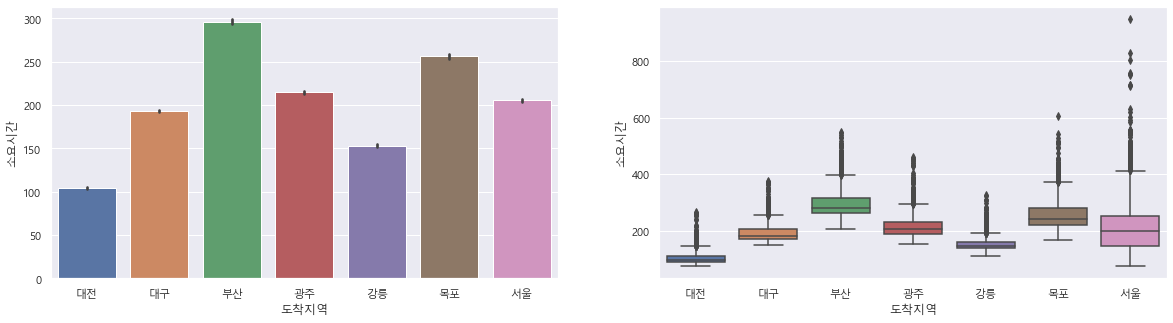

F_onewayResult(statistic=1630.9793653194693, pvalue=0.0)

In [ ]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = '소요시간'
var = '도착지역'
#spst.ttest_ind(df[var], df[target])
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=var, y=target, data=df)
plt.subplot(1,2,2)
sns.boxplot(x=var, y=target, data=df)
plt.show()
P_1 = df.loc[df.도착지역 == '대전', target]
P_2 = df.loc[df.도착지역 == '대구', target]
P_3 = df.loc[df.도착지역 == '부산', target]
P_4 = df.loc[df.도착지역 == '광주', target]
P_5 = df.loc[df.도착지역 == '강릉', target]
P_6 = df.loc[df.도착지역 == '목포', target]
P_7 = df.loc[df.도착지역 == '서울', target]
spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6, P_7)

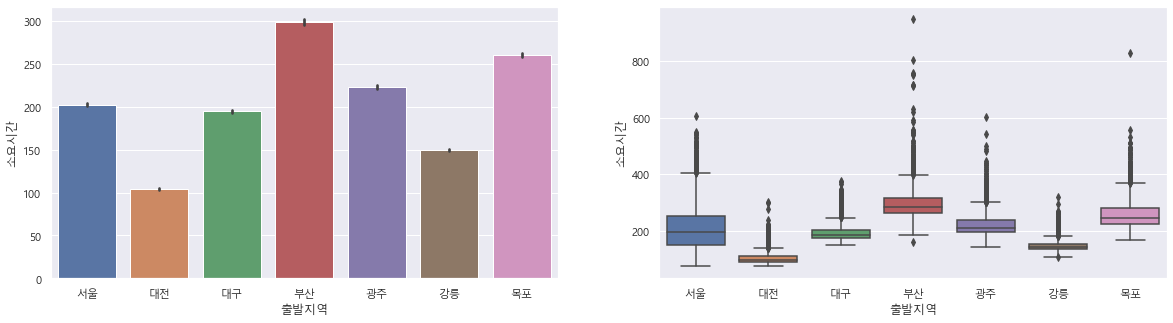

F_onewayResult(statistic=1773.6420356897518, pvalue=0.0)

In [ ]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
target = '소요시간'
var = '출발지역'
#spst.ttest_ind(df[var], df[target])
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=var, y=target, data=df)
plt.subplot(1,2,2)
sns.boxplot(x=var, y=target, data=df)
plt.show()
P_1 = df.loc[df.출발지역 == '대전', target]
P_2 = df.loc[df.출발지역 == '대구', target]
P_3 = df.loc[df.출발지역 == '부산', target]
P_4 = df.loc[df.출발지역 == '광주', target]
P_5 = df.loc[df.출발지역 == '강릉', target]
P_6 = df.loc[df.출발지역 == '목포', target]
P_7 = df.loc[df.출발지역 == '서울', target]
spst.f_oneway(P_1, P_2, P_3, P_4, P_5, P_6, P_7)

# 머신러닝

In [ ]:
# Target 확인
target = '소요시간'

# 데이터 분리
x = df.drop(target, axis=1)
y = df[target]

In [ ]:
x.tail()

,시간,연도,연휴이름,연휴기간,출발지역,도착지역,방향,월,일
19570,19,2022,추석,D-3,목포,서울,귀경방향,9,7
19571,20,2022,추석,D-3,목포,서울,귀경방향,9,7
19572,21,2022,추석,D-3,목포,서울,귀경방향,9,7
19573,22,2022,추석,D-3,목포,서울,귀경방향,9,7
19574,23,2022,추석,D-3,목포,서울,귀경방향,9,7


In [ ]:
x.loc[19575] = [12, 2022, '추석', 'D-1', '서울', '부산', '귀성방향', 9, 9]

In [ ]:
# 가변수화 대상: 'REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN]
dum_col = ['시간','연도', '연휴이름','연휴기간', '출발지역', '도착지역', '방향', '월', '일']

# 가변수화
x = pd.get_dummies(x, columns = dum_col, drop_first=True)

# 확인
x.tail()

,시간_1,시간_2,시간_3,시간_4,시간_5,시간_6,시간_7,시간_8,시간_9,시간_10,...,일_22,일_23,일_24,일_25,일_26,일_27,일_28,일_29,일_30,일_31
19571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sample = pd.DataFrame(x.iloc[-1]).T
x.drop(19575, inplace=True)
x.tail()

,시간_1,시간_2,시간_3,시간_4,시간_5,시간_6,시간_7,시간_8,시간_9,시간_10,...,일_22,일_23,일_24,일_25,일_26,일_27,일_28,일_29,일_30,일_31
19570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split,cross_val_score

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
result = {}

In [ ]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor


# 선언하기 
model = DecisionTreeRegressor()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv =10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
result['DeT']=cv_score.mean()

[0.51031406 0.41449534 0.54418461 0.44690347 0.54167054 0.5967155
 0.61002651 0.46278542 0.50163936 0.54180019]
평균: 0.5170535008051053


In [ ]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor

# 선언하기 
model = KNeighborsRegressor()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv =10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
result['KNN']=cv_score.mean()

[0.66240696 0.64197094 0.66002569 0.6609241  0.67736329 0.68158772
 0.65820279 0.67037577 0.64427519 0.66031235]
평균: 0.6617444795022908


In [ ]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LinearRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv =10)

# 확인
print(cv_score)
print('평균:', cv_score.mean())
result['LoR']=cv_score.mean()

[0.76578912 0.76470489 0.74687935 0.74460888 0.77917499 0.77115147
 0.76092055 0.76097585 0.7329173  0.71982576]
평균: 0.7546948167201195


In [ ]:
result

{'DeT': 0.5170535008051053,
 'KNN': 0.6617444795022908,
 'LoR': 0.7546948167201195}

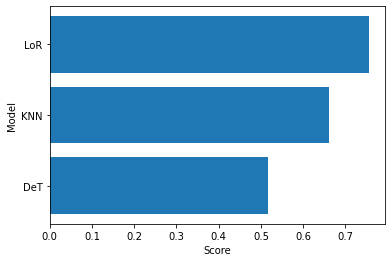

In [ ]:
# 성능 비교
plt.barh(y =list(result), width = result.values())
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# 모델선언
model = LinearRegression()

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

26.168108528783034
0.7482822824009903


# 에측

In [ ]:
y_pred = model.predict(sample)
print(f'{y_pred//60}시간 {y_pred%60}분')

[5.]시간 [7.75]분
